# Lezione 4
Argomenti di questa lezione:
- import, moduli, packages e namespaces
- File I/O
- Numpy: matrici e algebra lineare
    - array e funzioni
    - sequences, reshaping e slicing
    - linear algebra
- MatPlotLib: come generare grafici 
    - grafici 2D con linspace e grafica
    - axes e subplots
    - scatter e istogrammi
    - grafici 3d: superfici
    
## Import, moduli, packages e namespaces
Si dice **script** una collezione di strutture, operatori, datatype e funzioni, che unite in un unico file (con estensione *.py* o *.pyw*) generano un programma che esegue una *programming task*. Banalmente, è il classico file che si esegue e vi sputa fuori il risultato voluto.
Uno script può essere lanciato dall'interpreter di python, da Ipython oppure come eseguibile.

Un **module** è molto simile a uno script, anche questo è un file *.py*, ma a differenza di questo non viene utilizzato come *stand-alone*, ma le sue funzioni, le sue classi e in generale tutti i suoi contenuti sono usati in un altro script (o in un altro module).
Si utilizzano i modules sia per suddividere i propri programmi in più file, in modo da renderli più leggibili, sia per poter riutilizzare più volte lo stesso codice, anche in script diversi.

Una collezione di modules è detta **package**. Questa è suddivisa come un unica cartella principale all'interno della quale possono essere contenute altre cartelle (**subpackage**) oppure dei modules. Ogni cartella contiene un file speciale, \_\_init\_\_.py, solitamente vuoto, che indica a python che il folder è un (sub)package. 
Numpy e Matplotlib, che vedremo oggi, sono esempi di packages.

Un **namespace** è un sistema utilizzato da python per assicurare che tutti i nomi che utilizziamo in uno script siano ben definiti, e che non vi siano conflitti. Alcuni esempi di namespace:
- local namespace: questo è il namespace utilizzato ad esempio all'interno di una funzione. Fa sì che le variabili dichiarate all'interno della funzione non vadano in conflitto con quelle dichiarate nel resto dello script, anche se hanno lo stesso nome.
- global namespace: include i nomi dei vari moduli importati, fa sì che i nomi usati nei moduli non vadano in conflitto fra loro o con i nomi dello script.
- built-in namespace: include le funzioni definite di base in python.
I namespace sono particolarmente importanti per i modules perché determinano come dovremo richiamare le varie funzioni o classi.

Per utilizzare il contenuto di un module nel nostro script dobbiamo utilizzare il comando `import`. Ci sono diversi modi di utilizzarlo. 
Nota: negli esempi seguenti, con keyword si intende una qualsiasi variabile, funzione o classe che ha nome keyword.
- `import modulename` conserva il nome del modulo (o package) all'interno del namespace. Per utilizzare keyword nello script bisogna scrivere `modulename.keyword`.
- `import modulename as name` rinomina il modulo (o package) in name. Per usare keyword si usa `name.keyword`
- `from modulename import keyword` non importa tutto il modulo, ma solo keyword. In questo modo, per usare keyword basta scrivere  `keyword`. Da usare con cautela perché può sovrascrivere un oggetto nel nostro script che ha anch'esso il nome keyword.
- `from modulename import *` NON CONSIGLIATO, come già detto la scorsa volta. Questo importa tutte le keyword del modulo (o package) nel namespace base, perciò è facile che sovrascriva qualche oggetto. Per usare keyword basta scrivere `keyword`.

Per accedere a un modulo contenuto in un subpackage, scrivo `packagename.subpackagename.modulename`. In pratica navigo il package usando un punto per indicare che scendo di cartella.

0.49999999999999994


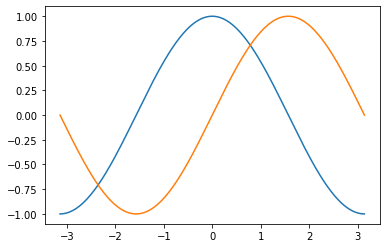

IntSlider(value=200, description='Slider Widget:', max=450, min=50)

In [7]:
import math
import numpy as np
from matplotlib.pyplot import plot, show
from ipywidgets import *
from IPython.display import display

print(math.sin(math.pi/6))

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

plot(x, c)
plot(x, s)
show()

w1 = IntSlider(border_radius=2, font_size=12, width=650,
                          border_color='blue', slider_color='red', description='Slider Widget:',
                          min=50, max=450, value=200)  # da ipywidgets
display(w1)


## File I/O
Spesso capiterà di dover salvare dei risultati su un file, o leggerne i contenuti e formattarli o analizzarli automaticamente.
Per estensioni più complicate di file, come ad esempio excel o .csv si utilizza il package pandas, che vedremo più avanti, oppure altri package appositi per estensioni particolari. Se ci limitiamo a file di testo, in estensione .txt, python offre una soluzione built-in ai nostri problemi.

Per leggere o modificare un file è necessario:
- aprire il file
- leggere o scrivere 
- chiudere il file

Vediamo nello specifico ognuna delle tre fasi.
Per la prima è sufficiente la funzione built-in `open(file,**kwargs)`, dove `file` è il path al file (relativo o assoluto). 
I `**kwargs` sono argomenti aggiuntivi che modificano il comportamento del file. Qui si può specificare la modalità di apertura utilizzando una stringa che contenga uno o più dei seguenti caratteri.

| Mode | Description                                                                |Default   |
|------|----------------------------------------------------------------------------|----------|
| r    | Read only                                                                  | Sì       |
| w    | Write. Genera un nuovo file se non esiste, tronca quelli già esistenti     |          |
| x    | Crea un nuovo file                                                         |          |
| a    | Scrive in fondo al file senza troncarlo.  Crea un nuovo file se non esiste |          |
| t    | Text mode                                                                  | Sì       |
| b    | Binario. Usato per file che non sono testo, come immagini e .exe           |          |
| +    | Updating (read e write                                                     |          |

Si può anche selezionare il tipo di encoding, che modifica come vengono letti i file di testo

In [12]:
f = open("test.txt",mode = 'r',encoding = 'utf-8')

Per chiudere i file si utilizza il metodo `filevariable.close()`.
Abbiamo già visto che però questo metodo non è affidabile, perciò si preferisce usare o un blocco `try...finally`, o ancora meglio un blocco `with`.

In [11]:
try:
    f = open("test.txt", 'w', encoding = 'utf-8')
    # perform file operations
finally:
   f.close()

with open("test.txt",encoding = 'utf-8') as f:
    # perform file operations
    pass

Una volta aperto il file, si possono usare i seguenti metodi per leggerlo o modificarlo:

In [20]:
with open("test.txt", 'w', encoding = 'utf-8') as f: # write
    f.write("Hello, AISF\n")
    f.write('Lorem ipsum\nThe answer is 42\n')
    f.write('Goodbye, AISF')
    
with open("test.txt", 'r', encoding = 'utf-8') as f: # read
    print(f.read(5)) # legge i primi 5 caratteri
    print(f.read(5)) # legge i 5 dopo
    print("---------")

    print(f.read()) # legge il resto del testo
    print(f.read()) # dopodiché restituisce una stringa vuota
    
    print("---------")
    # in pratica sposta un cursore al punto in cui ha letto l'ultima volta
    print(f.tell()) # posizione attuale del cursore
    f.seek(0) # sposto il cursore al carattere 0
    
    print("---------")
    print(f.readline()) # legge una riga intera
    print("---------")

    f.seek(0)
    for line in f:
        print(line.strip()) # con un ciclo for posso stampare tutto il file. Uso strip() per evitare doppi a capo

Hello
, AIS
---------
F
Lorem ipsum
The answer is 42
Goodbye, AISF

---------
57
---------
Hello, AISF

---------
Hello, AISF
Lorem ipsum
The answer is 42
Goodbye, AISF


Ecco una lista di tutti i comandi che si possono usare su un file: https://www.tutorialspoint.com/python/file_methods.htm

## Numpy
Questa è uno dei packages più utilizzati in assoluto, è molto versatile e permette di utilizzare operazioni anche complicate in modo molto efficiente, senza doverle definire. È alla base del scientific programming perché offre supporto per algebra lineare e analisi dei segnali

Qualche documentazione dove potete trovare più informazioni:
* [Numpy Reference guide](http://docs.scipy.org/doc/numpy/reference/)
* [SciPy Reference](http://docs.scipy.org/doc/scipy/reference/)
* [Scipy Topical Software](http://www.scipy.org/Topical_Software)
* [Numpy Functions by Category](http://www.scipy.org/Numpy_Functions_by_Category)
* [Numpy Example List With Doc](http://www.scipy.org/Numpy_Example_List_With_Doc)  

Iniziamo importando numpy:

In [21]:
import numpy as np
print ('numpy version: ', np.__version__)

numpy version:  1.16.5


### Array
Gli array sono l'oggetto principale di numpy. In particolare, sono array multidimensionali che possono contenere elementi tutti dello stesso tipo (solitamente numeri). In numpy, le dimensioni sono dette axes e il numero di axes è detto rank.
Gli attributi principali di un array sono:

* **ndarray.ndim**     - the number of axes (dimensions) of the array. 
* **ndarray.shape**    - the dimensions of the array. For a matrix with n rows and m columns, shape will be (n,m). 
* **ndarray.size**     - the total number of elements of the array. 
* **ndarray.dtype**    - numpy.int32, numpy.int16, and numpy.float64 are some examples. 
* **ndarray.itemsize** - the size in bytes of elements of the array. For example, elements of type float64 has itemsize 8 (=64/8) 

Definire un array è molto semplice

In [24]:
a = np.array([[0,1,2,3], [4,5,6,7], [8,9,10,11]])
rows, cols = np.shape(a)
print ('Rows:{0:03d} ; Cols:{0:03d}'.format(rows, cols))
print(a.dtype)

print()
# si può definire il dtype dell'array quando lo si crea:
b = np.array([[2,3], [6,7]], dtype=np.complex64)
print (b)
print(b.dtype)

Rows:003 ; Cols:003
int32

[[2.+0.j 3.+0.j]
 [6.+0.j 7.+0.j]]
complex64


### Creation functions
Esistono diversi metodi per generare array di shape definita e contenuti *placeholder* oppure generati in modo procedurale. Per questo si usano le **creation functions**.

In [53]:
print(np.zeros((3,4)))   # tutti zero
print()
print(np.ones((3,4)))    # tutti uno
print()
print(np.empty((2,3)))   # nessun valore: usa il valore contenuto nella cella di memoria
print()
print(np.eye(3))         # identità
print()
print(np.diag(np.arange(5)))    # diagonale con numeri da 0 a 4
print()
print(np.tile(np.array([[6, 7], [8, 9]]), (2, 2)))   # 2x2 quadrati con all'interno l'array [[67][89]]
print()
print(np.zeros_like(b))    # valori con lo stesso tipo dell'array specificato
print()
print(np.random.rand(2, 2)) # random 2x2 fra 0 e 1
print()
print(np.random.randn(2, 2)) # random 2x2 distribuiti normalmente (mean: 0, s.d: 1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]

[[6 7 6 7]
 [8 9 8 9]
 [6 7 6 7]
 [8 9 8 9]]

[0. 0. 0. 0. 0. 0.]

[[0.63311116 0.47075782]
 [0.07171089 0.27927157]]

[[ 1.45278486 -1.25859363]
 [ 0.6576471  -0.15682808]]


### Sequences, reshaping e slicing
Un altro modo di generare un array è usare le sequenze **linspace**, **logspace** (numeri equidistanziati lineari o logaritmici) e **arange**, poi **reshape** per trasformarli in matrici.

In [46]:
a = np.logspace(1,5,6)
print(a)
print()
print(a.reshape(3,2))
print()

b = np.linspace(1,5,6)
print(b)
print()
print(b.reshape(3,2))
print()

x = np.arange(4).reshape(2,2)
print(x)
print()

# un metodo molto usato per generare array è la list comprehension
c = np.array([[10*j+i for i in range(3)] for j in range(4)])
print (c)
print()

# si può usare newaxis per generare una nuova dimensione. 
# Questo è utilizzato per trasformare un vettore orizzontale in uno verticale
d = np.linspace(0, 12, 5)
print (d)
print (d[:, np.newaxis])       # make into a column vector

[1.00000000e+01 6.30957344e+01 3.98107171e+02 2.51188643e+03
 1.58489319e+04 1.00000000e+05]

[[1.00000000e+01 6.30957344e+01]
 [3.98107171e+02 2.51188643e+03]
 [1.58489319e+04 1.00000000e+05]]

[1.  1.8 2.6 3.4 4.2 5. ]

[[1.  1.8]
 [2.6 3.4]
 [4.2 5. ]]

[[0 1]
 [2 3]]

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]

[ 0.  3.  6.  9. 12.]
[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [51]:
X, Y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB
X

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [50]:
Y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

Esistono diversi modi di accedere ai valori di una cella, perciò è importante saper distinguere i casi per non fare confusione

In [57]:
X = np.arange(0, 20).reshape(4,5)
X # useremo questa matrice per gli esempi

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Come per le liste, si può facilmente accedere agli elementi semplicemente usando l'indice. Numeri negativi partono dal fondo.
Ricordare che: 
- si parte da 0
- gli array funzionano come liste dentro alle liste, perciò bisogna usare l'indice più volte. Anzichè due set di parentesi quadre, si possono usare indici separati da virgole
Si possono anche passare altri numpy.array come indici.

In [74]:
print(X[1])
print(X[-1][-2]) 
print(X[-1, -2])
print(X[np.array([1, 3])])

[5 6 7 8 9]
18
18
[[ 5  6  7  8  9]
 [15 16 17 18 19]]


Gli array supportano lo slicing, come le liste:

In [66]:
print(X[2:4])
print(X[:-2])
print(X[2:4, ::2])

[[10 11 12 13 14]
 [15 16 17 18 19]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[10 12 14]
 [15 17 19]]


Una delle funzioni più particolari sono i *boolean array* (o *mask array*). Questi sono array sliceati usando una variabile booleana determinata valore per valore.

In [79]:
b = X > 7
print(X[b])

# altro modo di scriverlo:
print(X[X > 7])

# si può passare un array di valori booleani:
b = np.array([True, False, False, True])
print(X[b]) # stampa solo prima e quarta riga

[ 8  9 10 11 12 13 14 15 16 17 18 19]
[ 8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [15 16 17 18 19]]


Si possono usare combinazioni di questi metodi per ottenere gli array desiderati.

### Linear Algebra
Come già detto, numpy offre supporto per le operazioni di algebra lineare, usando metodi come

In [87]:
print(X.transpose())
print(X.T)
print(X.min())
print(X.mean())
print(X.cumsum())

[[ 0  5 10 15]
 [ 1  6 11 16]
 [ 2  7 12 17]
 [ 3  8 13 18]
 [ 4  9 14 19]]
[[ 0  5 10 15]
 [ 1  6 11 16]
 [ 2  7 12 17]
 [ 3  8 13 18]
 [ 4  9 14 19]]
0
9.5
[  0   1   3   6  10  15  21  28  36  45  55  66  78  91 105 120 136 153
 171 190]


Si possono applicare funzioni a un array, e questa funzione viene applicata automaticamente a tutto l'array:

In [91]:
print(2*X)
print(X+6)
print(X*X)  # element wise product
print(X.dot(X.T)) # dot product

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]]
[[ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]]
[[  30   80  130  180]
 [  80  255  430  605]
 [ 130  430  730 1030]
 [ 180  605 1030 1455]]


In [94]:
def weirdfunction(x):
    print(x)
    x = np.sin(x)
    return x
    
print(weirdfunction(X))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [96]:
Y = np.random.rand(4, 4)
print(Y)
invY = np.linalg.inv(Y)    # inversa
print(Y.dot(invY))        
print(np.linalg.det(Y))    # determinante

[[0.87114879 0.0065487  0.06249674 0.40385436]
 [0.0550286  0.00895653 0.81502034 0.48367223]
 [0.01566413 0.61024998 0.75738731 0.01186924]
 [0.14666817 0.52482205 0.80832983 0.04213191]]
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 8.8817842e-16]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
0.04888113284620699


[Altre funzioni di algebra lineare](https://www.tutorialspoint.com/numpy/numpy_linear_algebra.htm)

[Altre funzioni di statistica](https://www.tutorialspoint.com/numpy/numpy_statistical_functions.htm)

[Funzioni di search e sort](https://www.tutorialspoint.com/numpy/numpy_sort_search_counting_functions.htm)

In numpy si può fare castig. In modo simile a come succede in python, quando casto come int tronco il numero arrtondando per difetto.

In [97]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
print (b)                     # ancora floating-point
c = np.around(a).astype(int)  # così prima arrotondo, poi casto a int
print (c)
d = a.astype(int)             # così tronco il numero
print(d)

[1. 2. 2. 2. 4. 4.]
[1 2 2 2 4 4]
[1 1 1 2 3 4]


## Matplotlib
Uno dei package più usati e più completi per generare grafici di ogni tipo. [matplotlib documentation](http://matplotlib.org/contents.html) per avere informazioni e funzioni aggiuntive, come al solito consiglo di controllare voi stessi la documentazione.

Iniziamo importando il package. Per ora useremo solo il module pyplot

In [99]:
%matplotlib inline    
# magic function di Ipython che genera i grafici direttamente sotto la riga di comando
# e li salva nel notebook
import matplotlib.pyplot as plt

Abbiamo già visto in un esempio precedente come si possono generare grafici di una funzione: il modo più facile è usare numpy.linspace 

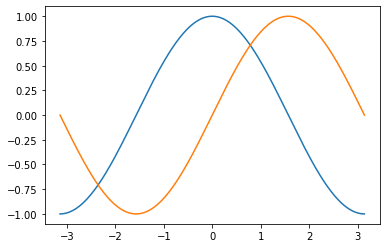

In [115]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

plt.plot(x, c)
plt.plot(x, s)
plt.show()

Di seguito si genera la stessa figura ma con alcune modifiche all'aspetto, poi la si salva come .png

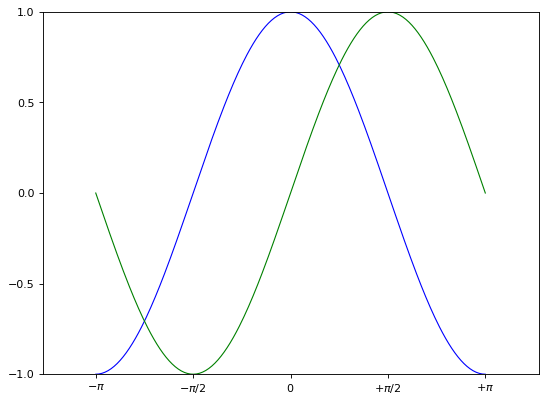

In [119]:
# Create a figure of size 8x6 points, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)
# Create a new subplot from a grid of 1x1
plt.subplot(111)
# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(x, c, color="blue", linewidth=1.0, linestyle="-")
# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(x, s, color="green", linewidth=1.0, linestyle="-")
# Set x limits
plt.xlim(-4.0, 4.0)
# Set x ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
# Set y limits
plt.ylim(-1.0, 1.0)
# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# Save figure using 72 dots per inch
plt.savefig('temp/test_plot_01.png', dpi=300)
plt.show()

Aggiungere dettagli:
* **Spines** sono righe che connettono i tick degli assi e suddividono il grafico. Possono essere posizionate dove si vuole
* **Legend:** self-explainatory
* **Annotations:** si possono aggiungere annotazioni su punti particolari
* **Tick Labels:** è possibile modificare anche lo stile dei tick

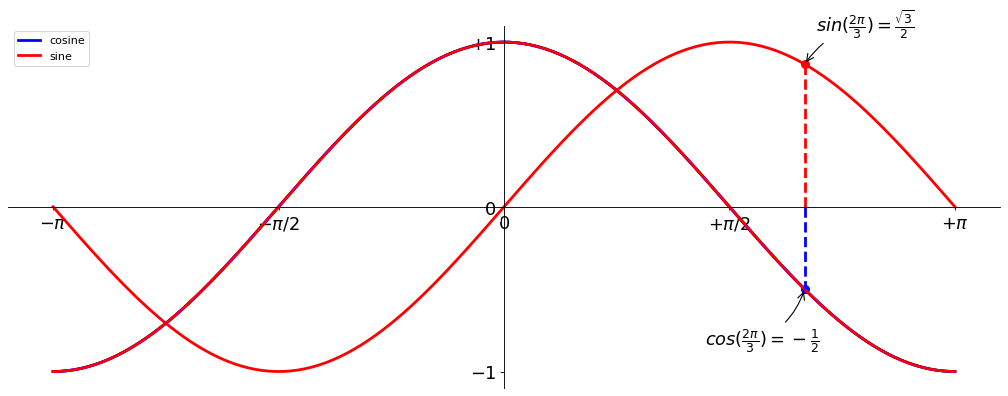

In [120]:
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x, s, color="red",  linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
# Spines:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Legend:
plt.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(x, c, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')

# Annotations:
t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Tick Labels:
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

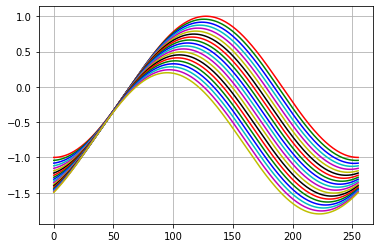

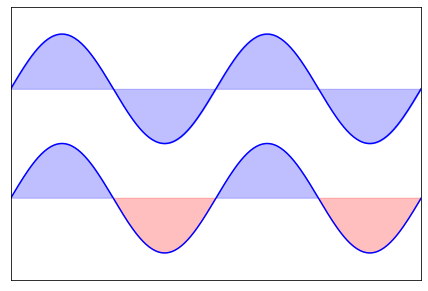

In [123]:
# Altre opzioni grafiche


# cycling through colors
from itertools import cycle

colors = cycle('rgbcmyk')
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
for i, c in zip(np.linspace(0,0.8,20), colors):
    plt.plot(np.cos(x+i)-i, c)

plt.grid()
plt.show()


# color fill
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y + 1, color='blue', alpha=.25)

plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi, np.pi)
plt.xticks(())
plt.ylim(-2.5, 2.5)
plt.yticks(())

plt.show()

### Suddividere i grafici con axes e subplots
È possibile aggiungere [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html), cioè suddividere il nostro grafico in più parti, usando il comando `subplot()`. È necessario specificare il numero di righe e colonne.

Anche se si può usare da solo, il modo più efficiente di creare subplot è usare [gridspec](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html)

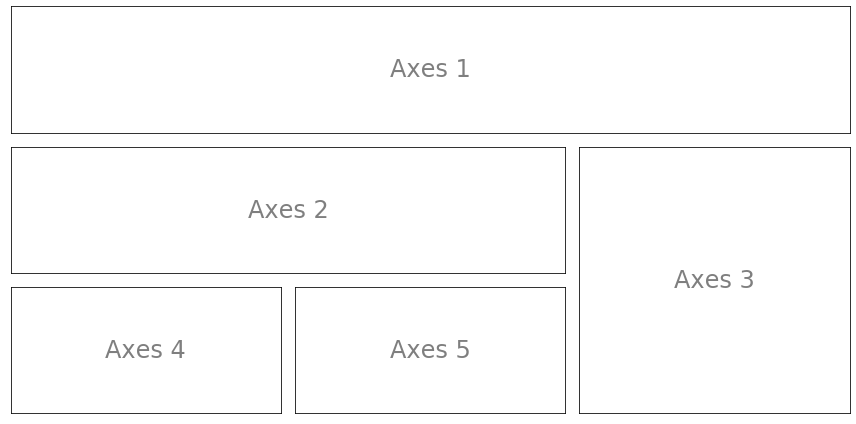

In [121]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12, 6))
G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=24, alpha=.5)

axes_2 = plt.subplot(G[1, :-1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=24, alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=24, alpha=.5)

axes_4 = plt.subplot(G[-1, 0])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=24, alpha=.5)

axes_5 = plt.subplot(G[-1, -2])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=24, alpha=.5)

plt.tight_layout()
plt.show()

Subplot divide la figura in più parti separate. Se vogliamo inserire una figura in un'altra lo possiamo fare con `axes()`

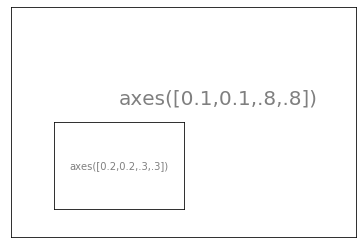

In [122]:
plt.axes([.1, .1, .8, .8])
plt.xticks(())
plt.yticks(())
plt.text(.6, .6, 'axes([0.1,0.1,.8,.8])', ha='center', va='center',
         size=20, alpha=.5)

plt.axes([.2, .2, .3, .3])
plt.xticks(())
plt.yticks(())
plt.text(.5, .5, 'axes([0.2,0.2,.3,.3])', ha='center', va='center',
        size=10, alpha=.5)

plt.show()

### Scatter plot e istogrammi
Per creare uno scatter plot è sufficiente usare `pyplot.scatter(x, y, **kwargs)`, con x e y oggetti di tipo numpy.array

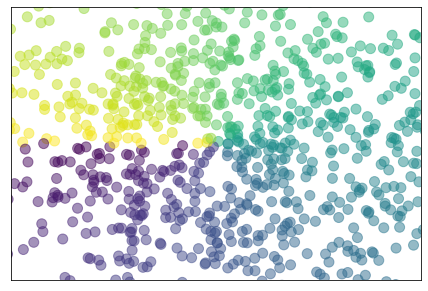

In [126]:
n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=100, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

Allo stesso modo, con `pyplot.bar(x, y, **kwargs)` posso generare istogrammi 

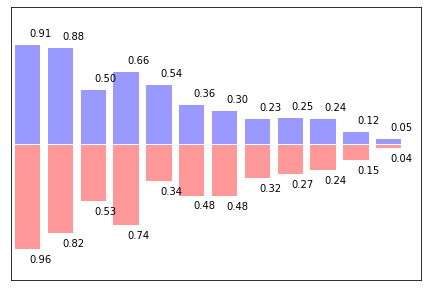

In [127]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '{:.2f}'.format(y), ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y - 0.05, '{:.2f}'.format(y), ha='center', va= 'top')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

### 3D surfaces
Matplotlib permette di generare anche superfici tridimensionali grazie al modulo mplot3d.

Per generarle è necessario utilizzare la funzione `numpy.meshgrid(x, y)` ([documentazione](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html), [What is the purpose of meshgrid?](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)), con x e y numpy.array unidimensionali, che restituisce due array bidimensionali con elementi ripetuti in modo tale da riempire le dimensioni aggiuntive.

In pratica, restituisce tutte le possibili combinazioni di x e y possibili

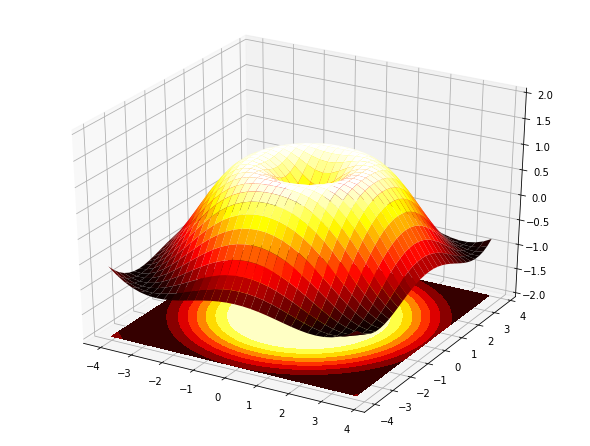

In [133]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()